# Agile Predators Figure 1: For-profit enrollment by ownership over time

In [1]:
*Agile Predators Figure 1
clear all
insheet using "https://raw.githubusercontent.com/charlieeatonphd/agilepredators/master/agilepredatorsdata20191116.csv", comma clear
drop if year<1990 | year>2015
keep if owner_pe=="Private equity" | owner_pe=="Publicly traded" | owner_pe=="Privately held"



(52 vars, 205,262 obs)

(23,320 observations deleted)

(110,308 observations deleted)


In [2]:
collapse (sum) total_enrollment, by(owner_pe year)

In [3]:
encode owner_pe, gen(owner_pes)

In [4]:
replace total_enrollment=total_enrollment/1000000

(78 real changes made)


In [5]:
drop owner_pe
reshape wide total_enrollment, i(year) j(owner_pes)



(note: j = 1 2 3)

Data                               long   ->   wide
-----------------------------------------------------------------------------
Number of obs.                       78   ->      26
Number of variables                   3   ->       4
j variable (3 values)         owner_pes   ->   (dropped)
xij variables:
                       total_enrollment   ->   total_enrollment1 total_enrollment2 total_enrollment3
-----------------------------------------------------------------------------


In [6]:
label var total_enrollment1 "Privately equity"
label var total_enrollment2 "Privately held"
label var total_enrollment3 "Publicly traded"

In [7]:
replace total_enrollment1= total_enrollment1 + total_enrollment2
replace total_enrollment3= total_enrollment2 + total_enrollment3


(26 real changes made)

(26 real changes made)


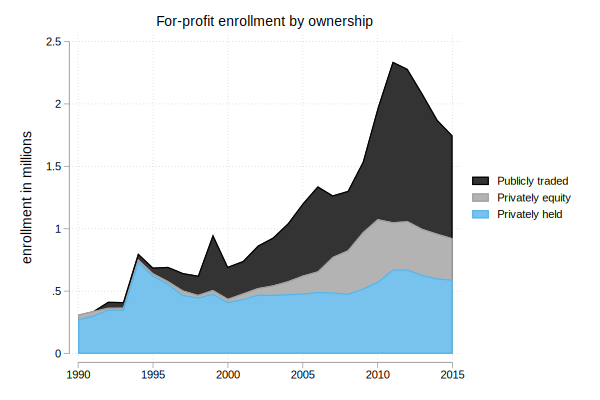

In [8]:
tw (area total_enrollment3 total_enrollment1 total_enrollment2 year), legend(cols(1) position(3)) ///
title(For-profit enrollment by ownership) scheme(plotplainblind) ytitle(enrollment in millions) xtitle("")